# **HW1: Movie Reviews Classification**


**Identifier**: Kaustubh
#G01314326

Importing libaries

In [48]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Train and Test Data Frame

In [49]:
train = pd.read_csv("training.txt", delimiter="\n", header= None, engine='python')
train['Review']=''
train.columns = ['Rating','Review']

Rating=[]
Review=[]
for i in range(0,len(train)):
    data = train.loc[i][0].split("\t")
    Rating.append(data[0])
    Review.append(data[1])  

dict = {"Rating":Rating, "Review":Review}
train = pd.DataFrame.from_dict(dict) 

In [50]:
trainRating = train['Rating'].values
trainRating

In [67]:
trainRating

array(['-1', '+1', '+1', ..., '+1', '-1', '-1'], dtype=object)

In [51]:
test = pd.read_csv("test data.txt", sep = "#EOF", header= None, engine='python')
test.columns = ['Review']

Pre-processing Train Data

In [52]:
wordnet=WordNetLemmatizer()
trainCleanData = list()
length = len(Review)
stopWords = stopwords.words('english')
for i in range(length):
    txt = re.sub('[^a-zA-Z]', ' ', Review[i])  
    txt = txt.lower() 
    txt = nltk.word_tokenize(txt)
    txt = [wordnet.lemmatize(word) for word in txt if not word in set(stopWords)]
    txt = [word for word in set(txt)]
    txt = ' '.join(txt)
    trainCleanData.append(txt)

Pre-Processing Test Data

In [53]:
testCleanData = list()
length = len(test['Review'])
for i in range(length):
    txt = re.sub('[^a-zA-Z]', ' ', test['Review'][i])
    txt = txt.lower() 
    txt = nltk.word_tokenize(txt)
    txt = [wordnet.lemmatize(word) for word in txt if not word in set(stopWords)]
    txt = [word for word in set(txt)]
    txt = ' '.join(txt)
    testCleanData.append(txt)

***Validating the classifier using train test split function on train and test data.***

Train Test Split function

In [54]:
X_train, X_test, y_train, y_test = train_test_split(trainCleanData,trainRating, random_state=1, test_size=0.2)

Applying TF-IDF and calculating Cosine Similarity 

In [55]:
tfidf = TfidfVectorizer()

In [56]:
X_trainTF = tfidf.fit_transform(X_train)
X_testTF = tfidf.transform(X_test)
cosSimilarX = cosine_similarity(X_testTF, X_trainTF)

K-Nearest Neighbor Classifier Implementation

In [57]:
def NearestNeighborClassifier(k, cos_similarity, rating):   
  sentiments = list()
  for i in cos_similarity:   
    kn = np.argsort(-i)[:k]      
    positiveCounter = 0
    negativeCounter = 0
    for val in kn:    
      if rating[val] == '+1':
        positiveCounter+=1
      else:
        negativeCounter+=1   

    if positiveCounter>negativeCounter:
      sentiments.append('+1')
    else:
      sentiments.append('-1')  

  return sentiments    

Accuracy Check: KNN method applied

In [64]:
#k=143
ratingCD = list()
ratingCD = NearestNeighborClassifier(143, cosSimilarX, y_train)
print('Accuracy Score: ',metrics.accuracy_score(y_test,ratingCD)*100,'%',sep='')

Accuracy Score: 86.13333333333333%


In [68]:
#k=70
ratingCD = list()
ratingCD = NearestNeighborClassifier(70, cosSimilarX, y_train)
print('Accuracy Score: ',metrics.accuracy_score(y_test,ratingCD)*100,'%',sep='')

Accuracy Score: 85.16666666666667%


Graph for K and Accuracy

For loop to check best K value according to the highest accuracy.

In [65]:
count=1
accuracyList = list()
kValues = list()
for i in range(0,400, 2):
  ratingCD = list()
  ratingCD = NearestNeighborClassifier(count, cosSimilarX, y_train)
  accuracyList.append(metrics.accuracy_score(y_test,ratingCD)*100)
  kValues.append(count)
  count+=2

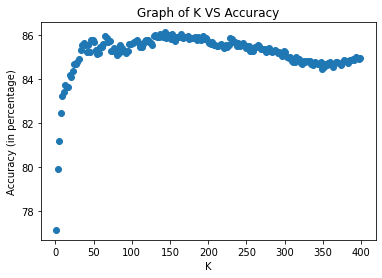

K: 143
Best Accuracy: 86.13333333333333 %


In [66]:
import matplotlib.pyplot as plt
plt.title('Graph of K VS Accuracy')

df = pd.DataFrame({"K":kValues, "Accuracy":accuracyList})
plt.scatter(df['K'], df['Accuracy'])
plt.ylabel('Accuracy (in percentage)')
plt.xlabel('K')
plt.show()

maxAccuracy = max(accuracyList)  
maxK = kValues[accuracyList.index(maxAccuracy)]  
print ("K:",maxK)
print ("Best Accuracy:", maxAccuracy,"%")

***Running K-Nearest Neighbor Classifier on Actual Test Data***

Applying TF-IDF and calculating Cosine Similarity

In [59]:
trainTF = tfidf.fit_transform(trainCleanData)
testTF = tfidf.transform(testCleanData)
cosSim = cosine_similarity(testTF, trainTF)

Applying K-Nearest Neighbor Classifier

In [61]:
#K=143
prediction = list()
prediction = NearestNeighborClassifier(143, cosSim, trainRating)


In [63]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in prediction)
resultFile.close()